creating figure in size of [20, 3]


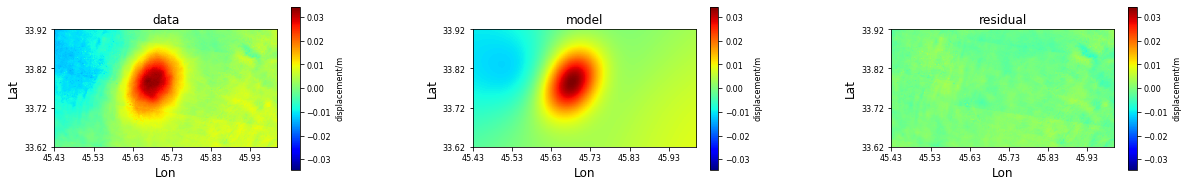

In [3]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
input_path = '/data2/rsmasdata/lxr/jupyter/insarlab/GBIS/GBIS_RESULTS/20180111/'
input_data = 'invert_1_2_F_asc_plot.mat'
mat_file = input_path + input_data
data = sio.loadmat(mat_file, struct_as_record=False, squeeze_me=True);
# latlon data
latlon = data['ll']
lat_key = np.unique(latlon[:,1])
lat_max = np.max(lat_key)
lat_min = np.min(lat_key)
lat_num = lat_key.shape[0]
lon_key = np.unique(latlon[:,0])
lon_num = lon_key.shape[0]
lon_max = np.max(lon_key)
lon_min = np.min(lon_key)

# convert 1D to 2D matrix
los = data['los'].reshape(lat_num,lon_num);
modlos = data['modLos'].reshape(lat_num,lon_num);
residual = data['residual'].reshape(lat_num,lon_num);

# plot data
fig_size = [20, 3]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=fig_size)
print('creating figure in size of {}'.format(fig_size))
dlim = np.nanmax(np.abs(los))
for ax, d in zip(axs[:], [los, modlos, residual]):
    im = ax.imshow(d, vmin=-dlim, vmax=dlim, cmap='jet')
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.tick_params(labelsize=8)
    font = {'weight': 'normal',
            'size': 8,
            }
    cbar.set_label('displacement/m',fontdict=font)
    #axs[0,0].set_ylabel('\n'.join(insarPlot.name.split('_', 1)))

axs[0].set_title('data',fontsize=12)
axs[0].set_xlabel('Lon',fontsize=12)
axs[0].set_ylabel('Lat',fontsize=12)
axs[1].set_title('model',fontsize=12)
axs[1].set_xlabel('Lon',fontsize=12)
axs[1].set_ylabel('Lat',fontsize=12)
axs[2].set_title('residual',fontsize=12)
axs[2].set_xlabel('Lon',fontsize=12)
axs[2].set_ylabel('Lat',fontsize=12)
for ax in axs[:]:
    xticks = np.arange(0,lon_num,100)
    x_labels = np.around((lon_min + 0.001*xticks),decimals=2).tolist()
    ax.set_xticks(xticks)
    ax.set_xticklabels(x_labels,fontsize=8)

    yticks = np.arange(0,lat_num,100)
    y_labels = np.around((lat_min + 0.001*yticks),decimals=2).tolist()
    ax.set_yticks(yticks)
    ax.set_yticklabels(y_labels,fontsize=8)
    ax.invert_yaxis()
#fig.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8, hspace=0.1, wspace=1.0)
fig.subplots_adjust( hspace=0.1, wspace=0.5)
#plt.show()
# save pictures
fig_name = input_data.split('.')[0]+'.png'
fig_output = input_path + fig_name
fig.savefig(fig_output, dpi=200, bbox_inches='tight')